### In this project, we will build a text classification model on song lyrics. The task is to predict the artist from a piece of text. 

- Download a HTML page with links to songs

- Extract hyperlinks of song pages

- Download and extract the song lyrics

- Vectorize the text using the Bag Of Words method

- train a classification model that predicts the artist from a piece of text

- refactor the code into functions

- Write a simple command-line interface for the program

##  STEP1. WEB SCRAPING

Download a HTML page with links to songs. To download web pages or send other HTTP requests in Python -->  requests module

In [1]:
import requests          #to download pages
import re
from bs4 import BeautifulSoup

In [2]:
#if we get a 403, try this:
#user_agent = {'User-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36'}
#source = requests.get("https://www.1001tracklists.com/", headers=user_agent)

In [3]:
def save_all_lyrics(url):

    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
    
    #DOWNLOAD ARTIST URL AS TEXT FILE
    response = requests.get(url,headers=headers)     #apply requests on my url
    response.text      # this is the URL code
    # save the string response_arcade.text to a newly created text file (in 'w'riting mode)
    filename = 'arcade_fire.html'
    open(filename, 'w', encoding = 'utf8').write(response.text)  #open :creates the file in writing mode
    
    #LOOK FOR ALL THE LINKS WITH REGULAR EXPRESIONS
    links = re.findall('href="([^"]+)"', response.text)  #find everything that starts with href 
    
    #CLEAN ALL THIS LINKS, WE WANT THE ONES THAT GO TO A LYRIC PAGE
    links = [l for l in links if l.endswith('lyrics/') and l.startswith('http://www.songlyrics.com/')]
    artist = links[0].split('/')[-3]  
    links_final = [l for l in links if artist in l]
    
    #REMOVE DUPLICATED LINKS
    all_songs=[]
    for links in links_final:
        song=links.split('/')[-2]
        all_songs.append(song)
        
    links_cleaned = []
    [links_cleaned.append(n) for n in links_final if n not in links_cleaned] 
    
    lyrics = []
    for url in links_final:
        response = requests.get(url)
        soup = BeautifulSoup(response.text)                #with soup, response.text now looks better
        lyr = soup.find(id={"songLyricsDiv-outer"}).text   #in every HTML, find the first"songLyricsDiv-outer"
        lyrics.append(lyr)
        
    return lyrics

In [4]:
arcade_lyr = save_all_lyrics("http://www.songlyrics.com/arcade-fire-lyrics/")

In [5]:
impala_lyr = save_all_lyrics("http://www.songlyrics.com/tame-impala-lyrics/")

## Select columns for y and X
I have artists data separated, but I want to join them to only have one X and one Y

In [107]:
X1 = arcade_lyr
X2 = impala_lyr

arcade_artist = ['arcade_fire']             #create a list with 198 times "arcade fire"
impala_artist = ['tame_impala']             #create a list with 140 times "tame_impala"

y1 = 198*arcade_artist
y2 = 140*impala_artist

In [108]:
len(X1), len(y1), len(X2), len(y2)

(198, 198, 140, 140)

In [109]:
type(X1), type(y1), type(X2), type(y2)

(list, list, list, list)

##### I want to merge X1,X2 and y1,y2 

In [110]:
mergedlist = []
mergedlist.extend(arcade_lyr)
mergedlist.extend(impala_lyr)

In [111]:
mergedlist[100]    #---- lyrics from Arcade Fire
mergedlist[197]    #---- lyrics from Arcade Fire - Intervention
mergedlist[198]    #---- lyrics from Tame Impala - Alter Ego ----- Till the end all from Tame Impala

"\nSaid the voice from afar,\nDon't you know it doesn't\nhave to be so hard? Waiting for\neveryone else around to argee,\nmight take too long\n\nWhen it won't be so hard,\n(it won't be so hard)\n\nWell it's true,yes, but you\nwont't get far telling me\nthat you are all you're meant\nto be, when the one from my\ndream is sitting right next\nto me and I don't know\nwhat to do\n\nOh alter ego.\n\nGet them to love you,\nwhile the may depending\non your words and wealth,\nthe only one who's really\njudging you is yourself.\nNobodyy else.\n\nIf I could part,\nit wouldn't be so hard.\n\nWell it's true yes, but you\nwon't get far telling me that\nyou are all you're meant to\nbe when the one from my\ndream is sitting right next\nto me and I don't know\nwhat to do.\n\nOh alter ego.\n"

In [112]:
len(mergedlist)                         #it has to be 338!

338

In [113]:
merged_artist = []
merged_artist.extend(y1)
merged_artist.extend(y2)

In [114]:
merged_artist = ['1' if artist == 'arcade_fire' else artist for artist in merged_artist]
merged_artist = ['0' if artist == 'tame_impala' else artist for artist in merged_artist]
merged_artist[197]      #0-197 is arcade fire (1)
merged_artist[198]      #198-end is tame impala (0)     

'0'

In [115]:
len(merged_artist),  len(mergedlist)                    #same shape, perfect!

(338, 338)

In [116]:
X = mergedlist
y = merged_artist

### STEP 2. Vectorize the text using the Bag Of Words method

### The Count Vectorizer (converting text into numbers):
#### Steps to build
* Create a corpus
* Fit a CV on it - train the algorithm on all the language
* Transform the corpus - for each document, turn it into a sparse, then dense, matrix

In [117]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import pandas as pd

In [118]:
cv = CountVectorizer()
vectorized_lyr = cv.fit_transform(X)
vectorized_lyr                             #now we have a 338x2926 SPARSE MATRIX
#3386 rows = all the lyrics
#2926 columns = all the words

<338x2926 sparse matrix of type '<class 'numpy.int64'>'
	with 23134 stored elements in Compressed Sparse Row format>

In [119]:
vectorized_lyr[:5].todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [120]:
len(cv.get_feature_names())     #2926 words

2926

Create a DF

In [121]:
readable_lyr_vectors = pd.DataFrame(vectorized_lyr.todense(), columns=cv.get_feature_names(), index=X)

In [122]:
readable_lyr_vectors.sum()

11           1
12           1
12th         1
13           3
18           1
            ..
yours       34
yourself     8
zone         2
écho         4
él           1
Length: 2926, dtype: int64

In [123]:
readable_lyr_vectors.shape

(338, 2926)

In [124]:
#readable_lyr_vectors.sum(axis=1)            #row 1 has 380 words

#### We have 2926 words, but we can reduce them using Tokenization, Stop words (and Normalizing the counts)

In [125]:
a = '(?u)\\b\\w\\w+\\b' #all words or numbers with length >1    ----  2712
b = '(?u)\\b\\w\\w*\\b' #all words or numbers of any length     ----  2695
c = '(?u)\\b[a-zA-Z]+\\b' #only returns words, ignores all numbers and special characters    ----   2681
cv = CountVectorizer(token_pattern=c, stop_words='english')
vectorized_lyr = cv.fit_transform(X)
vectorized_lyr 

<338x2681 sparse matrix of type '<class 'numpy.int64'>'
	with 13623 stored elements in Compressed Sparse Row format>

In [126]:
a = '(?u)\\b\\w\\w+\\b' #all words or numbers with length >1
b = '(?u)\\b\\w\\w*\\b' #all words or numbers of any length
c = '(?u)\\b[a-zA-Z]+\\b' #only returns words, ignores all numbers and special characters

pipeline = Pipeline([
    ('vect', CountVectorizer(token_pattern=c, stop_words='english')),   #CountVectorizer to transform the corpus into a matrix
    ('tfidf', TfidfTransformer())                     #TfidTransformer to normalize the counts
    ])
#strip_accents='ascii'

In [127]:
vectorized_lyrics = pipeline.fit_transform(X)
vectorized_lyrics                                         #the data has been reduced till 2681

<338x2681 sparse matrix of type '<class 'numpy.float64'>'
	with 13623 stored elements in Compressed Sparse Row format>

In [128]:
readable_tf_vectors = pd.DataFrame(vectorized_lyrics.todense().round(2), columns=cv.get_feature_names(), index=y)
type(readable_tf_vectors)

#readable_lyr_vectors = pd.DataFrame(vectorized_lyr.todense(), columns=cv.get_feature_names(), index=X)


pandas.core.frame.DataFrame

In [129]:
readable_tf_vectors.tail(10)       #we have til 2681 columns

,aaaah,abandoned,abc,abraham,absurd,accept,ache,aching,act,acting,...,yellow,yes,yesterday,yeux,yield,yo,yolk,young,youre,zone
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.13
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00


In [130]:
cv.get_feature_names()

['aaaah',
 'abandoned',
 'abc',
 'abraham',
 'absurd',
 'accept',
 'ache',
 'aching',
 'act',
 'acting',
 'action',
 'actors',
 'ad',
 'add',
 'address',
 'adjust',
 'administration',
 'admit',
 'adresss',
 'adventure',
 'advice',
 'afar',
 'affect',
 'afford',
 'afraid',
 'afterglow',
 'afterlife',
 'age',
 'agenda',
 'ago',
 'agree',
 'ah',
 'ahead',
 'ahh',
 'ahhh',
 'ahhhhhhhh',
 'aid',
 'aie',
 'ain',
 'aint',
 'air',
 'airplane',
 'aisle',
 'alan',
 'alarm',
 'alarme',
 'alarms',
 'alex',
 'alexander',
 'alice',
 'alidocious',
 'alive',
 'allegiance',
 'allies',
 'allow',
 'allows',
 'alonzo',
 'alors',
 'aloud',
 'alright',
 'alter',
 'alzheimer',
 'amazing',
 'amber',
 'ambulances',
 'america',
 'american',
 'ancient',
 'angel',
 'angry',
 'animal',
 'animals',
 'annee',
 'annihilate',
 'announcer',
 'answer',
 'answers',
 'anthem',
 'antiaircraft',
 'antichrist',
 'anticipation',
 'antoinish',
 'anybody',
 'anymore',
 'apart',
 'appears',
 'apple',
 'approaching',
 'arc',
 'ar

### AFTER THE PIPELINE, WE HAVE REDUCED OUR DATA AND TRANSFORMED AS A DF 

In [131]:
readable_tf_vectors

,aaaah,abandoned,abc,abraham,absurd,accept,ache,aching,act,acting,...,yellow,yes,yesterday,yeux,yield,yo,yolk,young,youre,zone
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
readable_tf_vectors = readable_tf_vectors.reset_index()
readable_tf_vectors = readable_tf_vectors.rename(columns={'index': 'artist'})

In [133]:
type(readable_tf_vectors)   

pandas.core.frame.DataFrame

In [134]:
df = pd.DataFrame(readable_tf_vectors)                   #convert to DF
df

,artist,aaaah,abandoned,abc,abraham,absurd,accept,ache,aching,act,...,yellow,yes,yesterday,yeux,yield,yo,yolk,young,youre,zone
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
334,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
X = df.loc[:, df.columns != 'artist']
y = df['artist']

### STEP 3. Train a classification model that predicts the artist from a piece of text

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [137]:
X_train.shape, X_test.shape

((253, 2681), (85, 2681))

In [138]:
type(X_train)

pandas.core.frame.DataFrame

In [139]:
from sklearn.linear_model import LogisticRegression 

In [140]:
model = LogisticRegression() #initialize the model
model.fit(X_train, y_train)   # trains the model

LogisticRegression()

In [141]:
model.score(X_train, y_train).round(3)

0.941

#### Testing your model on the test data

In [142]:
model.score(X_test, y_test).round(3)

0.918

In [143]:
from sklearn.model_selection import cross_val_score
import numpy as np
cv_all = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
cv_mean = cv_all.mean()
cv_std = np.std(cv_all)
f"Cross-validation mean {cv_mean:5.3f} +- {cv_std:5.3f}"

'Cross-validation mean 0.866 +- 0.031'

In [144]:
cv_mean

0.8656923076923076

In [145]:
cv_std

0.03102241983702076

<BarContainer object of 10 artists>

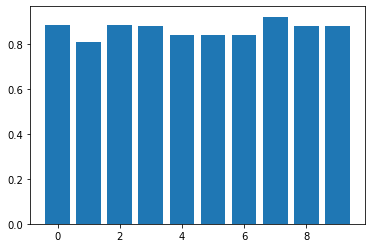

In [146]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from matplotlib import pyplot as plt
# Lets visualise a distribution of the results
plt.bar(range(10), cv_all)

In [147]:
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)
train_score

0.9407114624505929

In [148]:
# Is the score inside the range?
train_score > cv_all.min() and train_score < cv_all.max()

False

In [149]:
# Is the score is inside one sigma?
train_score - cv_mean < cv_std 

False

In [150]:
test_score = model.score(X_test, y_test)
test_score

0.9176470588235294

In [151]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=20, max_depth=2)
cross_val_score(m, X_train, y_train, cv=5, scoring='accuracy')

array([0.70588235, 0.74509804, 0.68627451, 0.74      , 0.7       ])

In [152]:
m.fit(X_train, y_train)
m.score(X_train, y_train)

0.8063241106719368

In [153]:
m.score(X_test, y_test)

0.7647058823529411